# **Analysis of cluster RCT data**
Note that, if you cannot run R in your jupyter environment, please access the following: https://drive.google.com/file/d/14FtF1653UA8gQGQRb6h3Q-MZKgJWkbll/view?usp=sharing 

**Preparation**

Install libraries for data analysis

In [1]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("stringr")
install.packages("ggpubr")
install.packages("lmerTest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import the essential libraries

In [2]:
library(tidyverse)
library(readxl)
library(stringr)
library(ggpubr)
library(lmerTest)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




**Import data**

Note that, we import data from an online source that can be updated every month. Data update will be stopped following completion of data collection.

*import patient data audited (DOT: no audit)*

In [3]:
temp <- tempfile()
download.file("https://drive.google.com/uc?id=1JIf42ApUEINDvHVmZxiF33ngLH5r9qQQ&authuser=0&export=download", temp)
patient_im<-read_excel(temp)

*import observer data audited*

In [4]:
temp <- tempfile()
download.file("https://drive.google.com/uc?id=1gNcP7FteHzK9r_WSIu-pG8zZtjKOlDbF&authuser=0&export=download", temp)
observer_im<-read_excel(temp)

**Descriptive data visualization**

*Visualization of patients' compliance days*

Data manipulation

In [5]:
patient<-patient_im
patient$no<-factor(patient$no)
patient$cluster<-factor(patient$no)
patient$d0<-1
patient$d62<-ifelse(patient$smear=="neg",3,ifelse(patient$smear=="pos",4,5))
longpat<-gather(patient, key = "day", value = "session",d1:d60,d62,d0)
longpat$session<-factor(longpat$session)
longpat$day<-str_sub(longpat$day,2,-1)
longpat$day<-as.numeric(longpat$day)

observer<-observer_im
observer$no<-factor(observer$no)
observer$cluster<-factor(observer$no)
observer$d0<-1 #to keep the patients who were completely ignored in visualization
longob<-gather(observer, key = "day", value = "session",d1:d60,d0)
longob$session<-factor(longob$session)
longob$cluster<-factor(longob$cluster)
longob$day<-str_sub(longob$day,2,-1)
longob$day<-as.numeric(longob$day)

Visualization of patients' compliance days in the VOT group

Warning message:
“Removed 19 rows containing missing values (geom_point).”


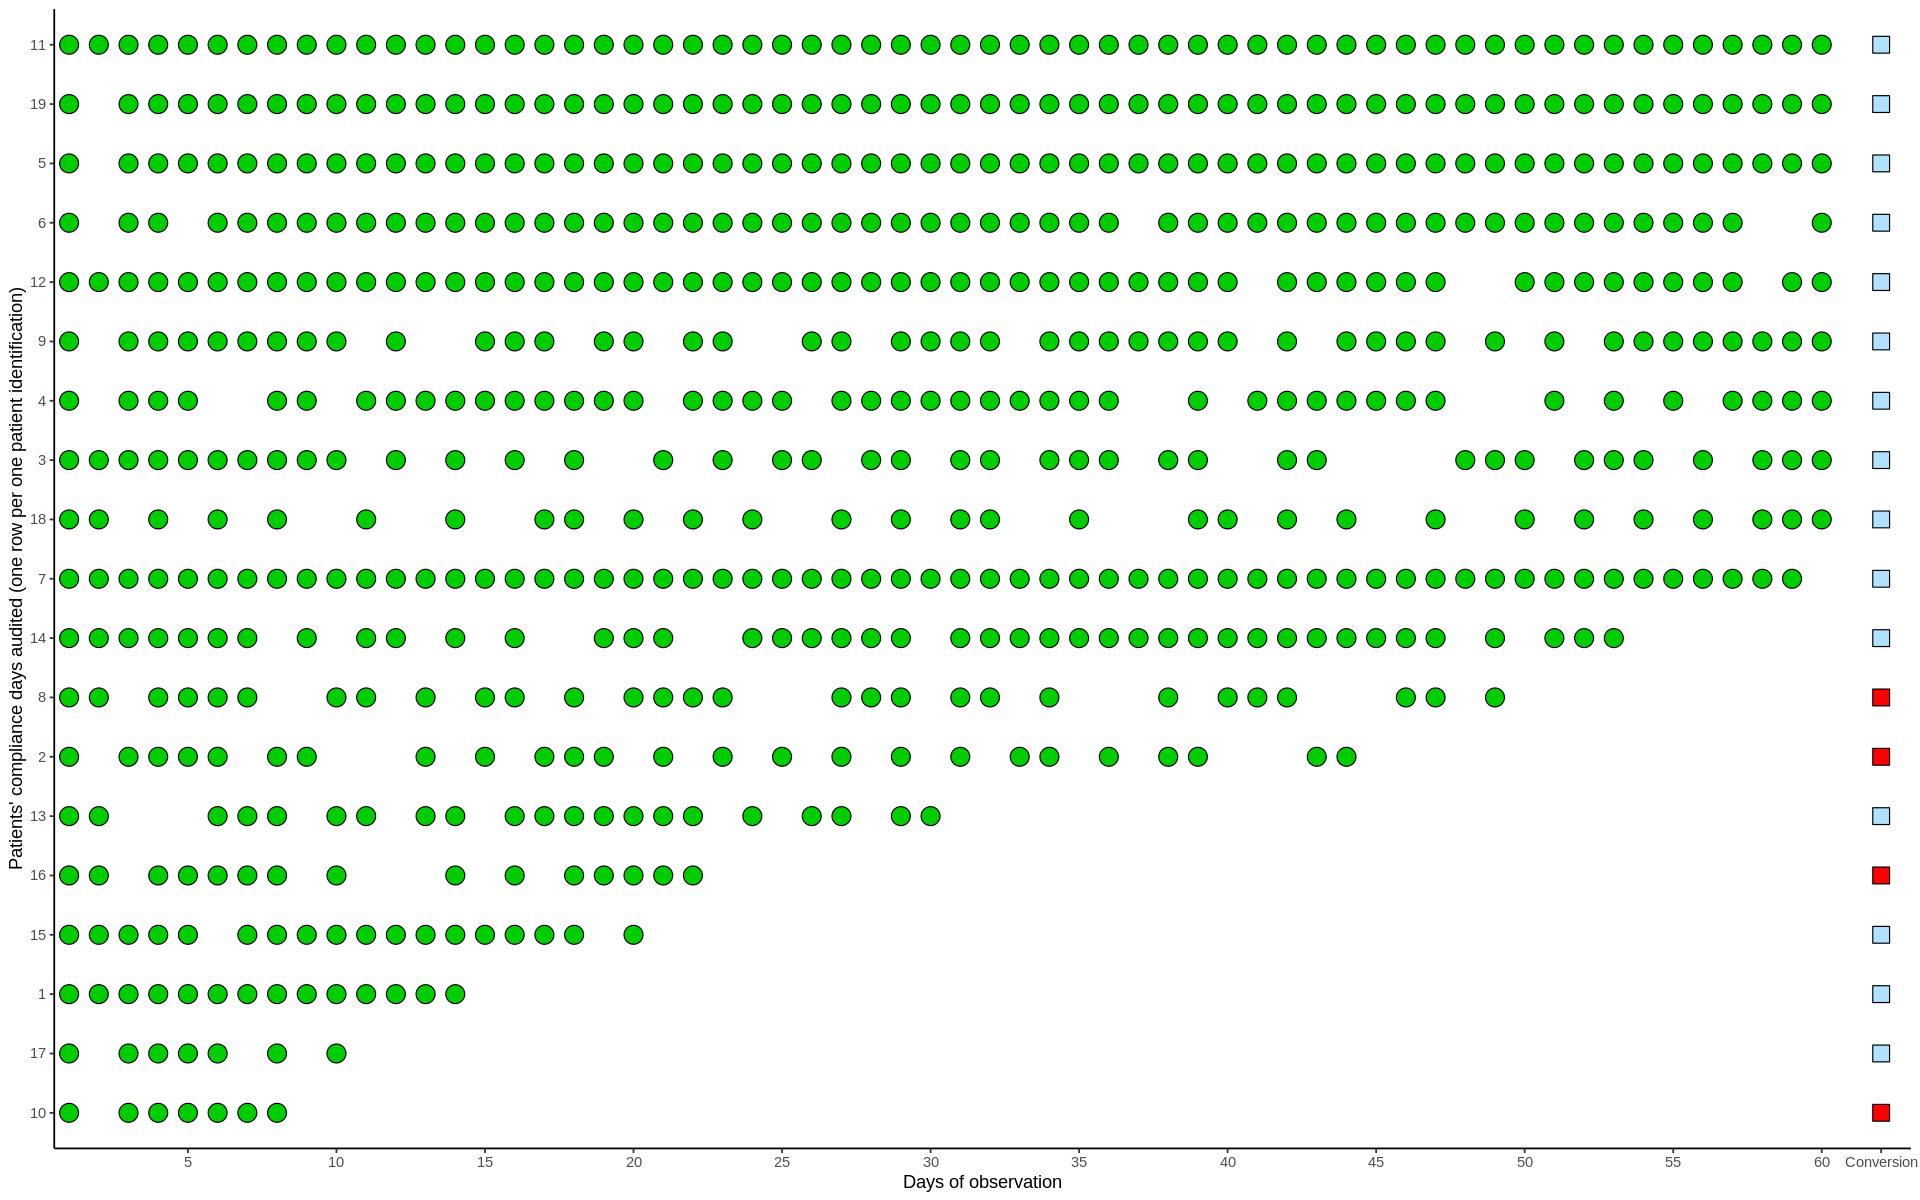

In [6]:
longvot<-longpat[longpat$type=="vot",-2]
longvot<-longvot[longvot$session != 0,]
ordvot<-longvot %>% group_by(no) %>% summarise(m=max(day[day!=62]),peak = sum(day[day!=62])) %>% arrange(m,peak)
longvot$no<-factor(longvot$no,levels = ordvot$no)
options(repr.plot.width=16, repr.plot.height=10)
ggplot(longvot[longvot$day == 62,],aes(x=day,y=no))+geom_point(aes(fill=session), 
                                                               colour="black",pch=22, size=5,show.legend = FALSE)+
  geom_point(data=longvot[longvot$day != 62,],aes(x=day,y=no,fill=session), 
             colour="black",pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(5*1:12,62),labels = c(5*1:12,"Conversion"),expand = c(0,0),limits = c(0.5,63))+
  scale_fill_manual(values = c("green3","lightskyblue1","red","black"))+
  xlab("Days of observation")+
  ylab("Patients' compliance days audited (one row per one patient identification)")+
  theme_classic()
fig_votpat<-ggplot(longvot[longvot$day == 62,],aes(x=day,y=no))+geom_point(aes(fill=session), 
                                                                           colour="black",pch=22, size=5,show.legend = FALSE)+
  geom_point(data=longvot[longvot$day != 62,],aes(x=day,y=no,fill=session), 
             colour="black",pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(5*1:12,62),labels = c(5*1:12,"Conversion"),expand = c(0,0),limits = c(0.5,63))+
  scale_fill_manual(values = c("green3","lightskyblue1","red","black"))+
  xlab("Days of observation")+
  ylab("Patients' compliance days audited (one row per one patient identification)")+
  theme_classic()

Visualization of observers' compliance days in the VOT group

Warning message:
“Removed 19 rows containing missing values (geom_point).”


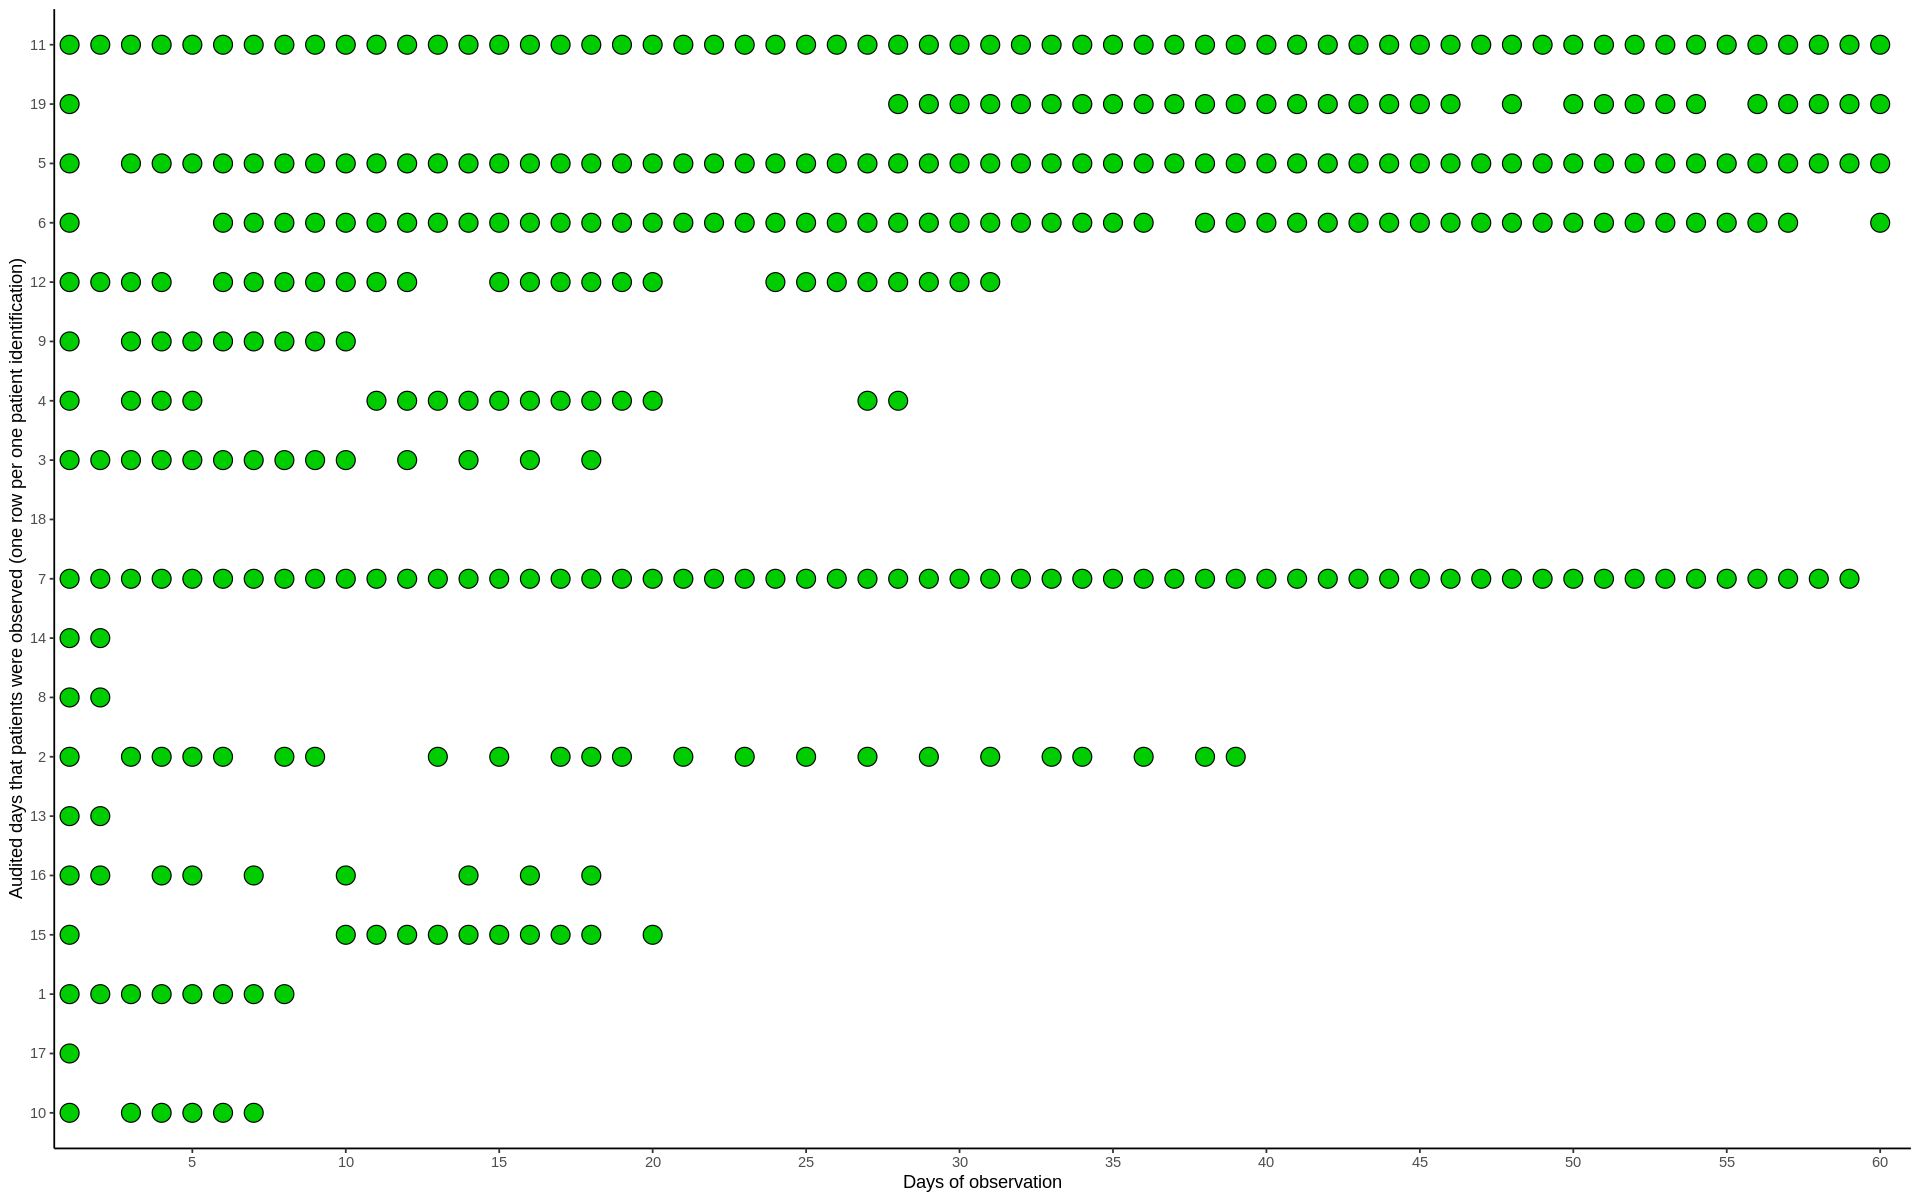

In [7]:
longvotob<-longob[longob$type=="vot",-2]
longvotob$no<-factor(longvotob$no,levels = ordvot$no)
longvotob<-longvotob[longvotob$session!=0,]
ggplot(longvotob,aes(x=day,y=no))+geom_point(aes(fill=factor(session),col=factor(session)), 
                                             pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(5*1:12),labels = c(5*1:12),expand = c(0,0),limits = c(0.5,61))+
  scale_fill_manual(values = c("green3","white"))+
  scale_colour_manual(values = c("black","white"))+
  xlab("Days of observation")+
  ylab("Audited days that patients were observed (one row per one patient identification)")+
  theme_classic()
fig_votob<-ggplot(longvotob,aes(x=day,y=no))+geom_point(aes(fill=factor(session),col=factor(session)), 
                                                        pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(5*1:12),labels = c(5*1:12),expand = c(0,0),limits = c(0.5,61))+
  scale_fill_manual(values = c("green3","white"))+
  scale_colour_manual(values = c("black","white"))+
  xlab("Days of observation")+
  ylab("Audited days that patients were observed (one row per one patient identification)")+
  theme_classic()

Combine visualization of patients’ and observers’ compliance days in VOT

Warning message:
“Removed 19 rows containing missing values (geom_point).”
Warning message:
“Removed 19 rows containing missing values (geom_point).”


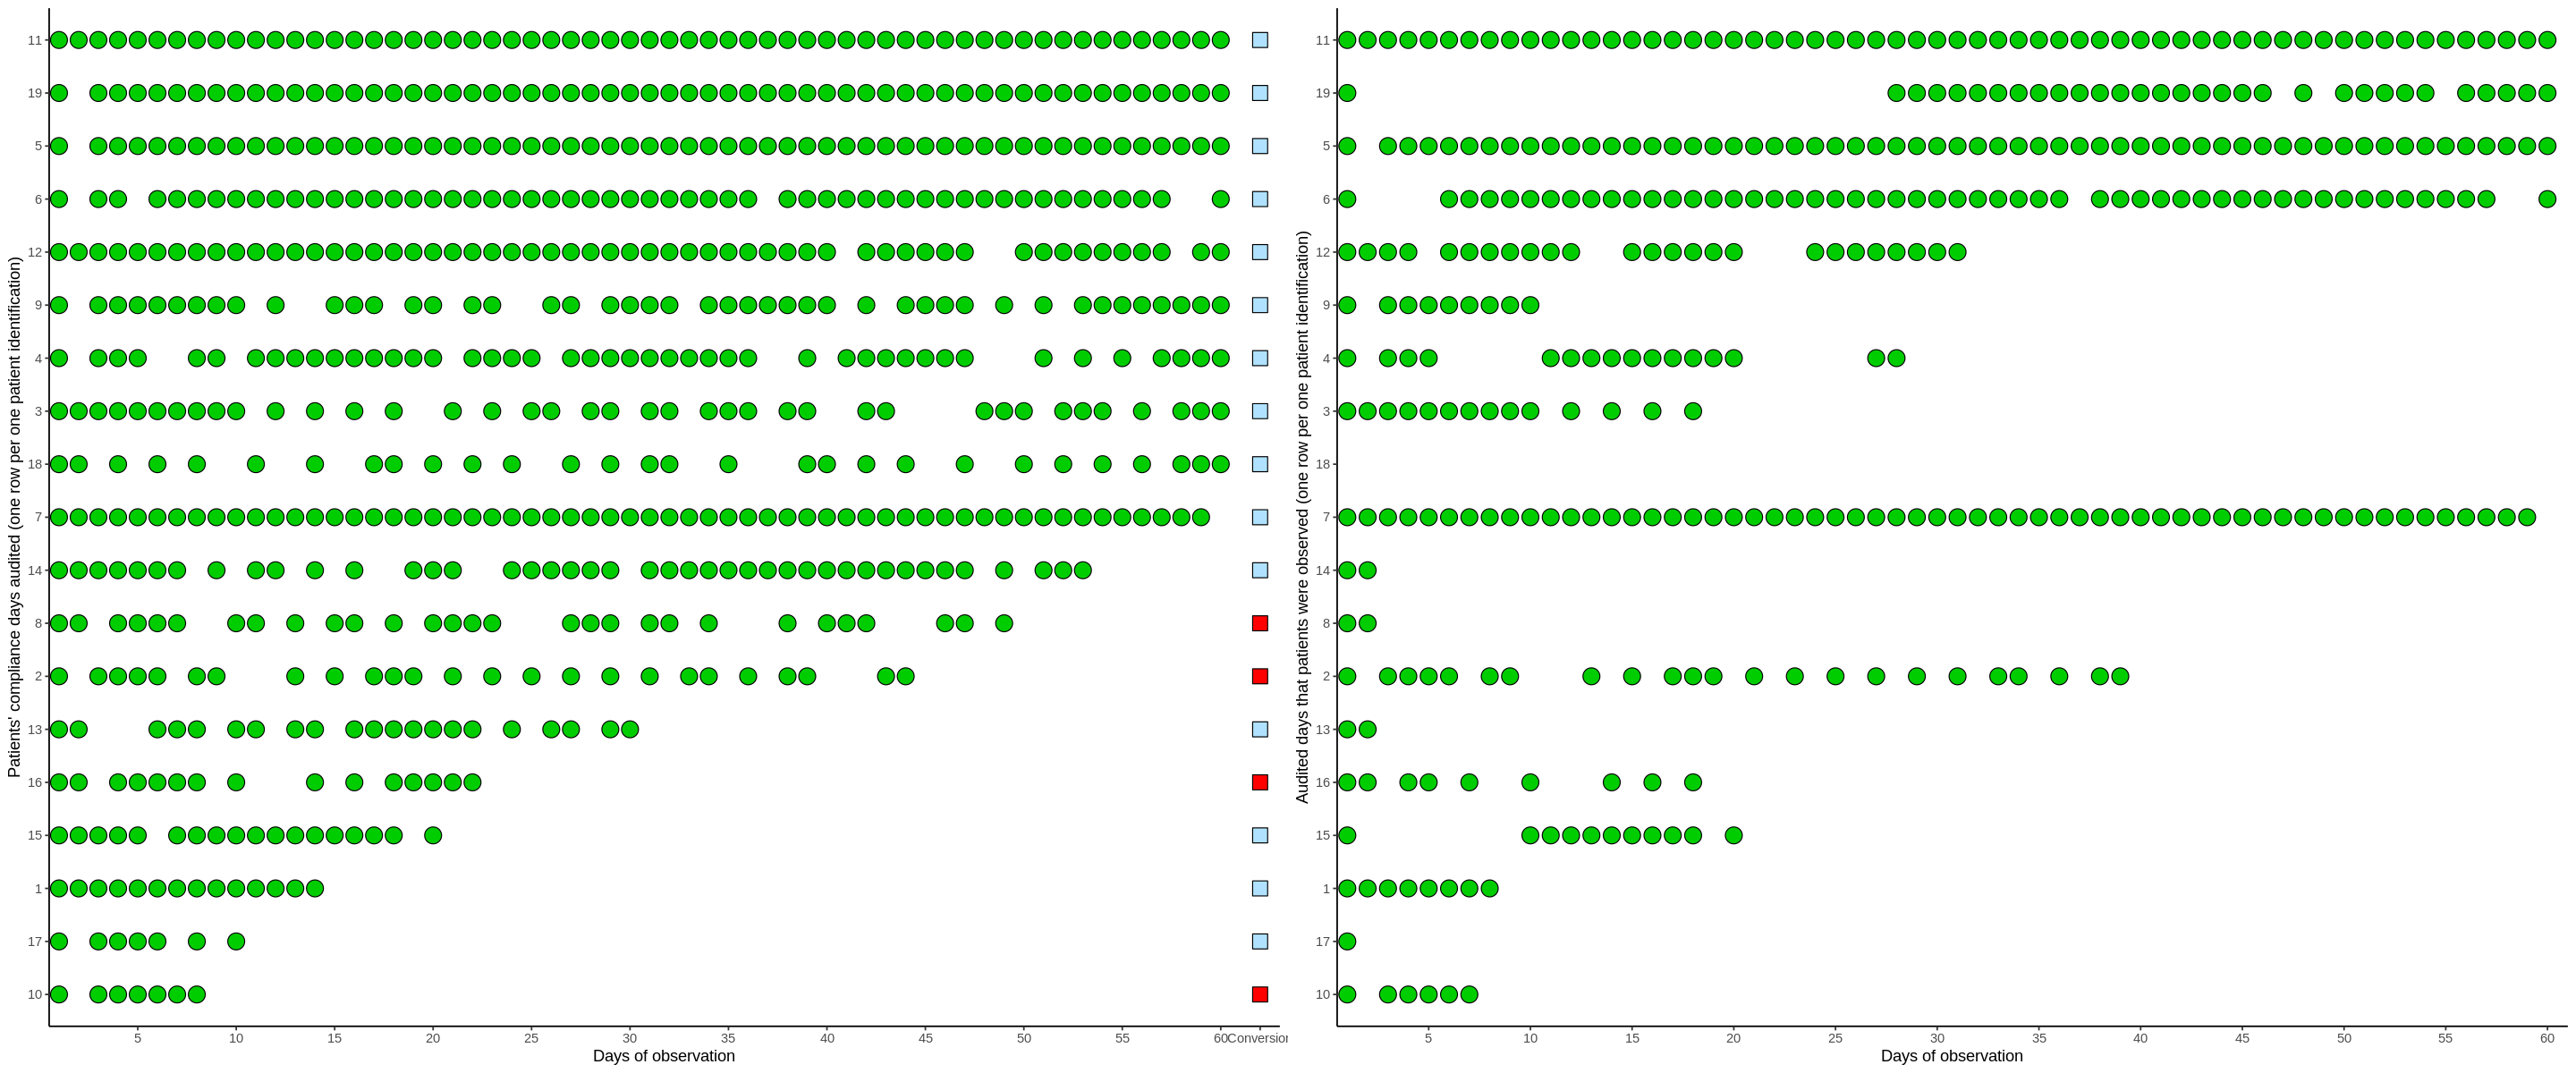

In [8]:
options(repr.plot.width=24, repr.plot.height=10)
ggarrange(fig_votpat, fig_votob,
          labels = c("", ""),
          ncol = 2, nrow = 1)

Visualization of patients' compliance days in the DOT group

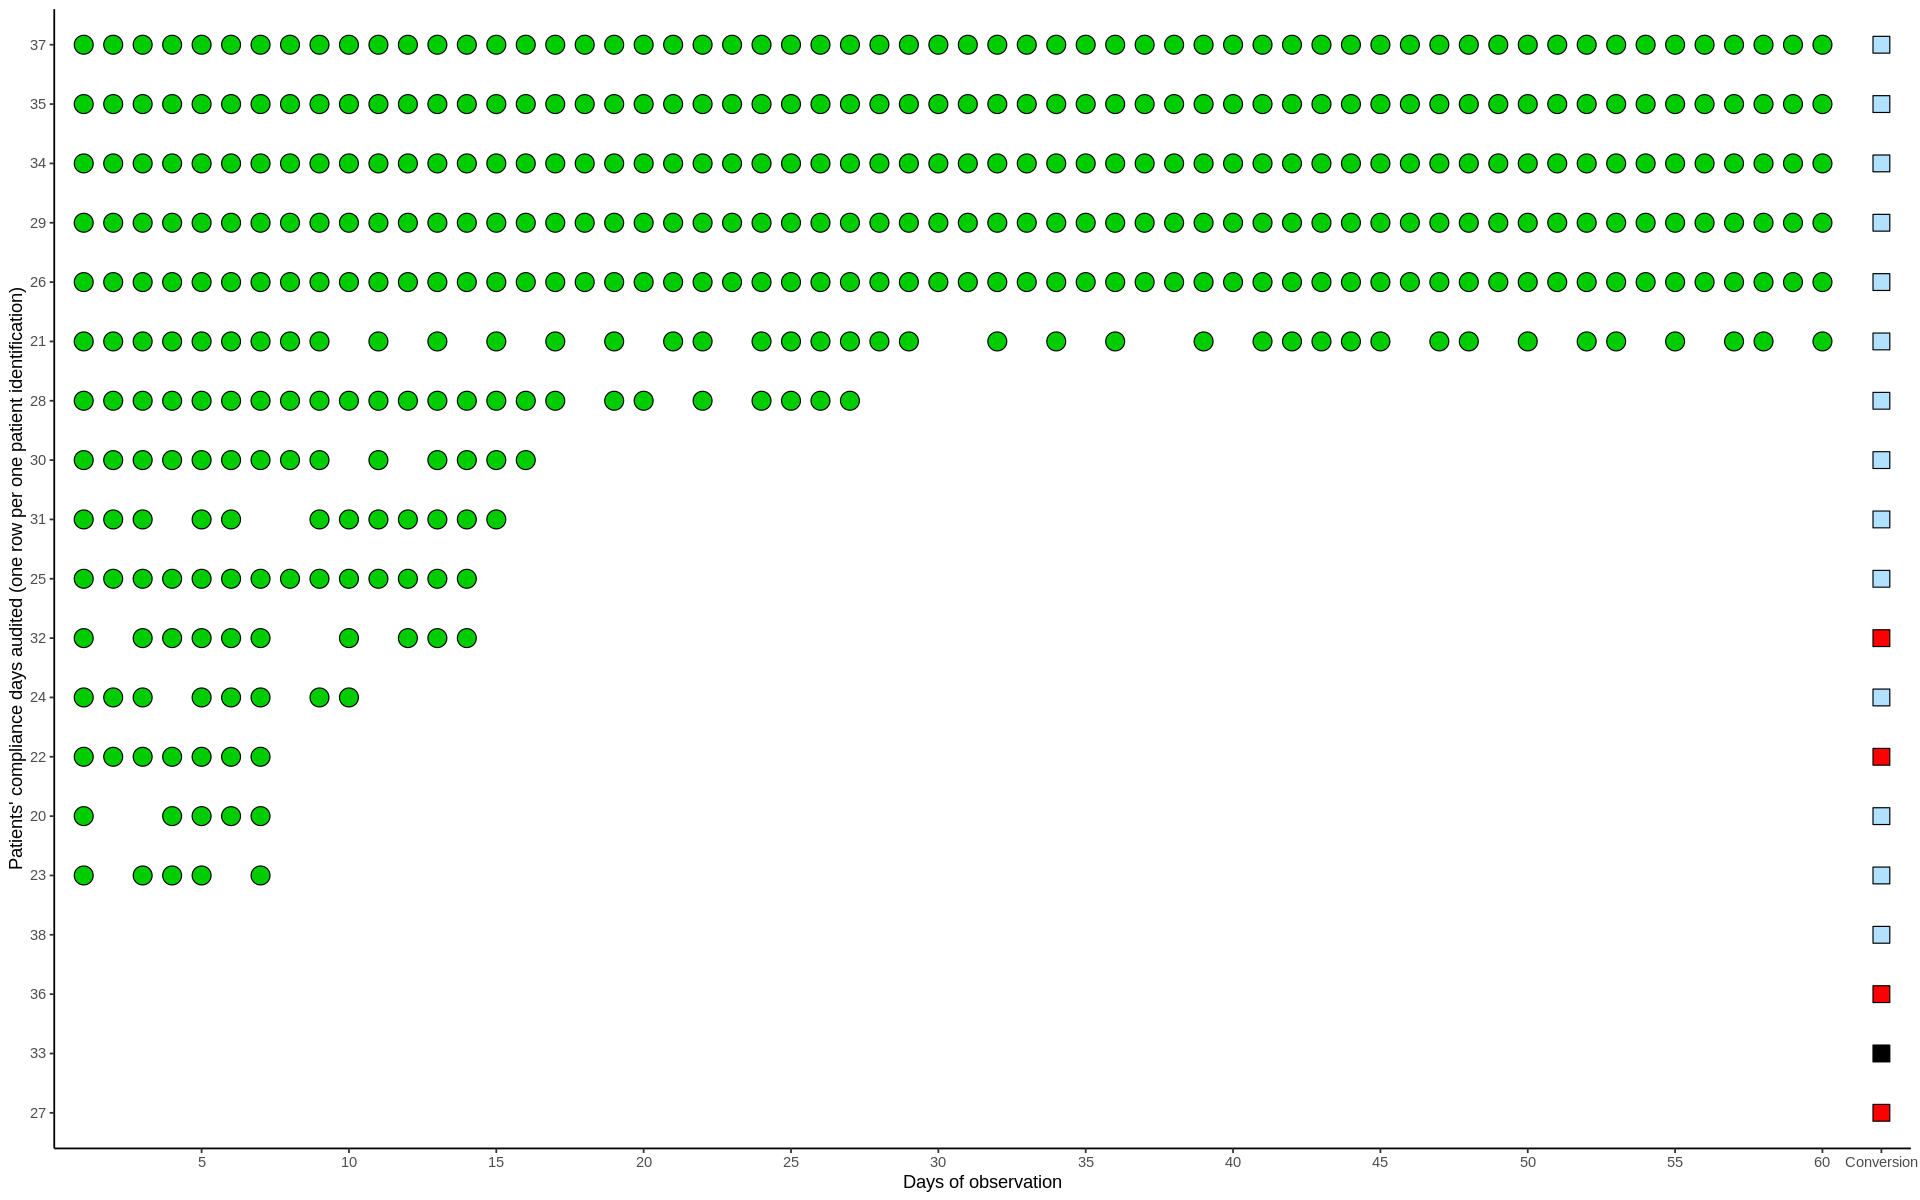

In [9]:
longdot<-longpat[longpat$type=="dot",-2]
longdot<-longdot[longdot$session != 0,]
orddot<-longdot %>% group_by(no) %>% summarise(m=max(day[day!=62]),peak = sum(day[day!=62])) %>% arrange(m,peak)
longdot<-longdot[longdot$day != 0,]
longdot$no<-factor(longdot$no,levels = orddot$no)
options(repr.plot.width=16, repr.plot.height=10)
ggplot(longdot[longdot$day == 62,],aes(x=day,y=no))+geom_point(aes(fill=session), 
                                                               colour="black",pch=22, size=5,show.legend = FALSE)+
  geom_point(data=longdot[longdot$day != 62,],aes(x=day,y=no,fill=session), 
             colour="black",pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(5*1:12,62),labels = c(5*1:12,"Conversion"),expand = c(0,0),limits = c(0,63))+
  scale_fill_manual(values = c("green3","lightskyblue1","red","black"))+
  xlab("Days of observation")+
  ylab("Patients' compliance days audited (one row per one patient identification)")+
  theme_classic()
fig_dotpat<-ggplot(longdot[longdot$day == 62,],aes(x=day,y=no))+geom_point(aes(fill=session), 
                                                                           colour="black",pch=22, size=5,show.legend = FALSE)+
  geom_point(data=longdot[longdot$day != 62,],aes(x=day,y=no,fill=session), 
             colour="black",pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(5*1:12,62),labels = c(5*1:12,"Conversion"),expand = c(0,0),limits = c(0,63))+
  scale_fill_manual(values = c("green3","lightskyblue1","red","black"))+
  xlab("Days of observation")+
  ylab("Patients' compliance days audited (one row per one patient identification)")+
  theme_classic()

Visualization of observers' compliance days in the DOT group

Warning message:
“Removed 19 rows containing missing values (geom_point).”


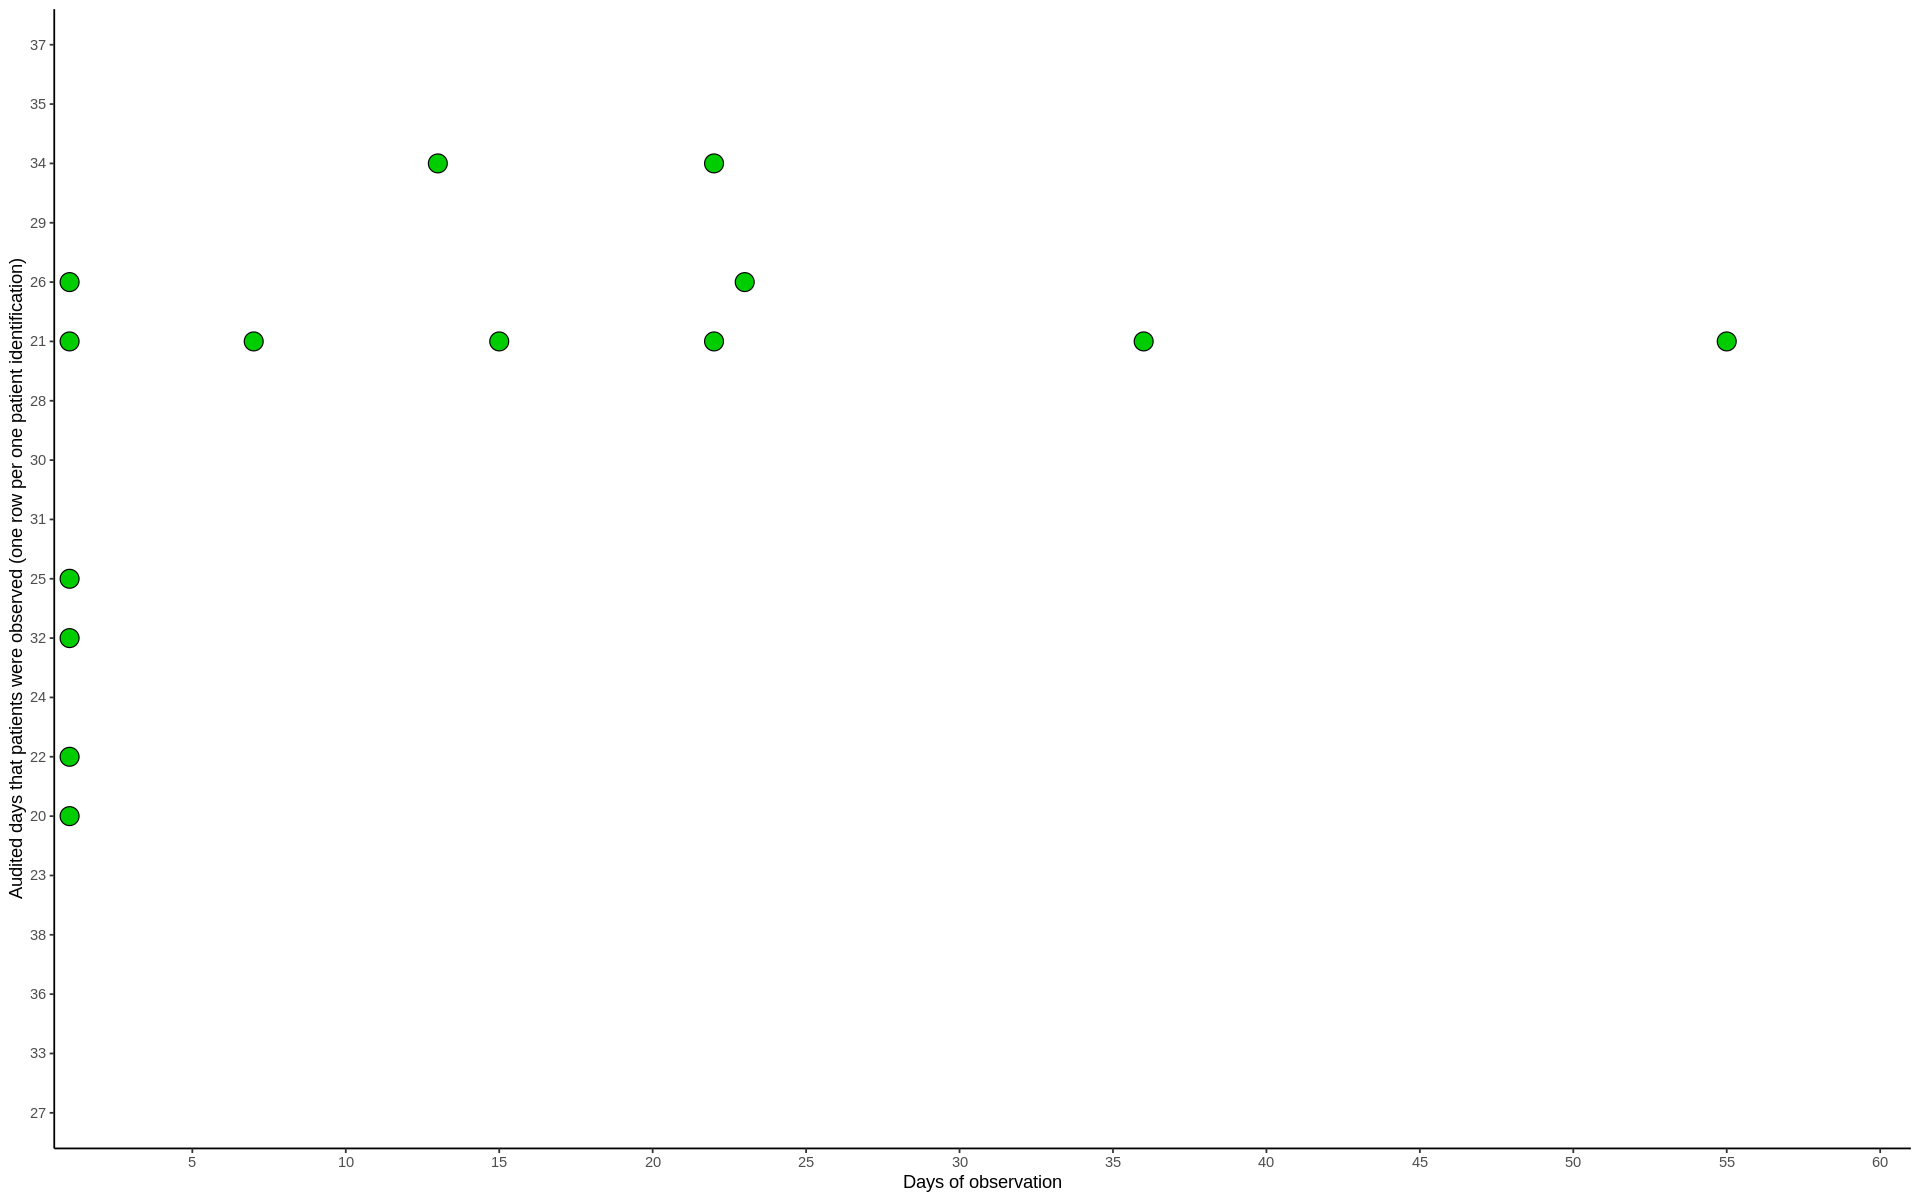

In [10]:
longdotob<-longob[longob$type=="dot",-2]
longdotob$no<-factor(longdotob$no,levels = orddot$no)
longdotob<-longdotob[longdotob$session!=0,]
ggplot(longdotob,aes(x=day,y=no))+geom_point(aes(fill=factor(session),col=factor(session)), 
                                             pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(5*1:12),labels = c(5*1:12),expand = c(0,0),limits = c(0.5,61))+
  scale_fill_manual(values = c("green3","white"))+
  scale_colour_manual(values = c("black","white"))+
  xlab("Days of observation")+
  ylab("Audited days that patients were observed (one row per one patient identification)")+
  theme_classic()
fig_dotob<-ggplot(longdotob,aes(x=day,y=no))+geom_point(aes(fill=factor(session),col=factor(session)), 
                                                        pch=21, size=5,show.legend = FALSE)+
  scale_x_continuous(breaks=c(5*1:12),labels = c(5*1:12),expand = c(0,0),limits = c(0.5,61))+
  scale_fill_manual(values = c("green3","white"))+
  scale_colour_manual(values = c("black","white"))+
  xlab("Days of observation")+
  ylab("Audited days that patients were observed (one row per one patient identification)")+
  theme_classic()

Combine visualization of patients’ and observers’ compliance days in DOT

Warning message:
“Removed 19 rows containing missing values (geom_point).”


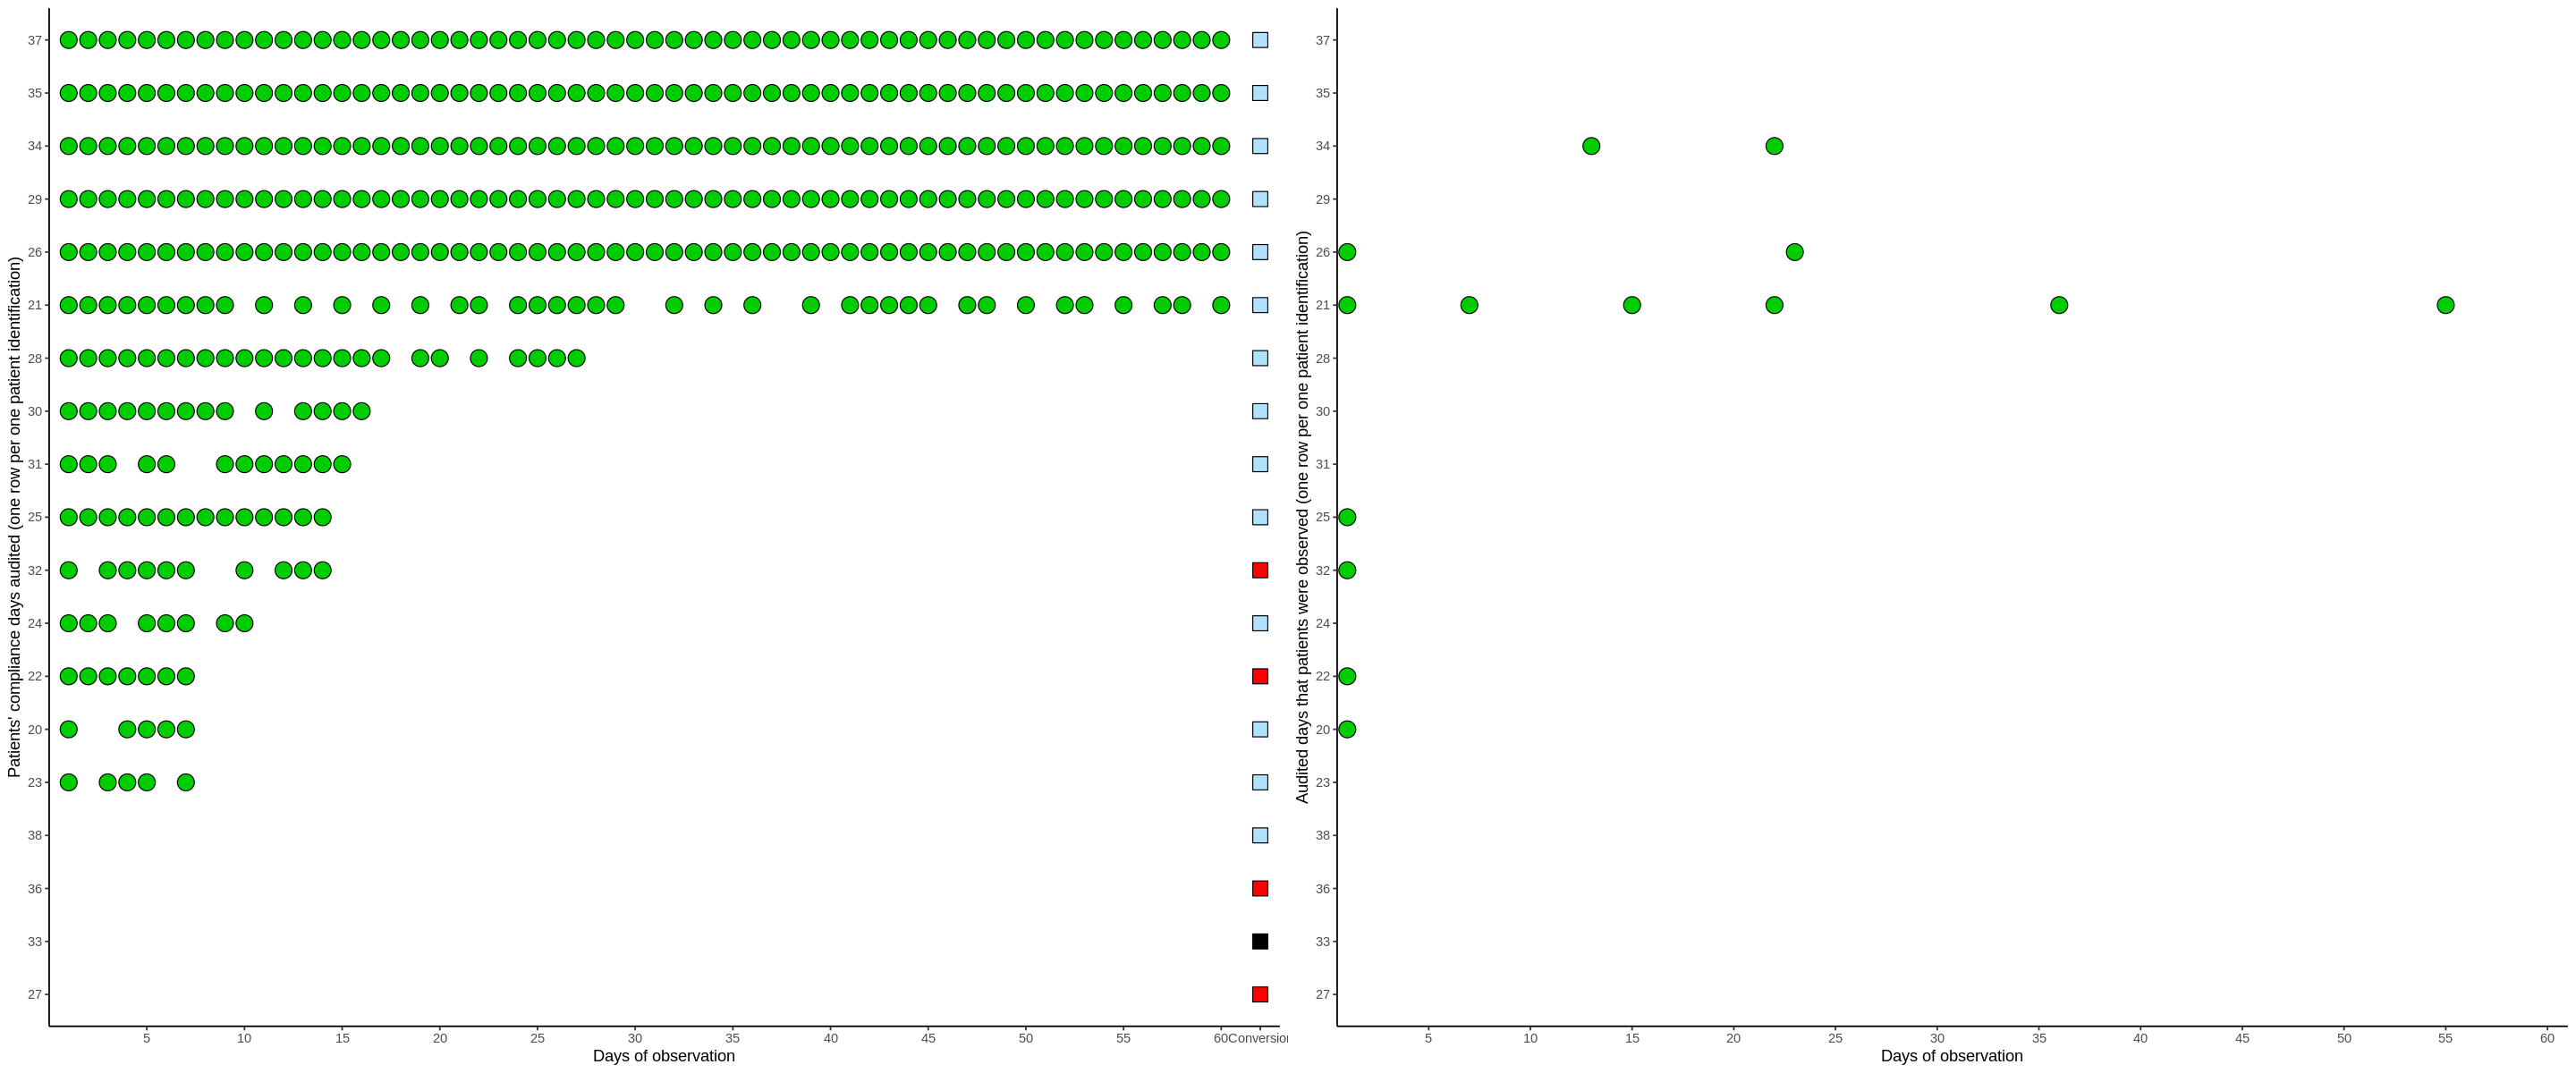

In [11]:
options(repr.plot.width=24, repr.plot.height=10)
ggarrange(fig_dotpat, fig_dotob,
          labels = c("", ""),
          ncol = 2, nrow = 1)

**Analysis of primary data**

In [12]:
cpat<-patient_im
longcpat<-gather(cpat, key = "day", value = "session",d1:d60)
longcpat<-longcpat%>% group_by(no,cluster,type) %>% summarise(com=sum(session,na.rm = TRUE)/60*100)
longcpat$type<-longcpat$type=="vot"
longcpat$cluster<-factor(longcpat$cluster)
cp_mod <- lmer(com ~ type + (type | cluster), longcpat)
summary(cp_mod)
com_se_votpat <- sqrt(diag(vcov(cp_mod)))[2]
com_coef_votpat <- round(fixef(cp_mod)[2]+fixef(cp_mod)[1],2)
upperCI_votpat <-  round(com_coef_votpat  + qnorm(0.975)*com_se_votpat,2)
lowerCI_votpat <-  round(com_coef_votpat  - qnorm(0.975)*com_se_votpat,2)
com_se_dotpat <- sqrt(diag(vcov(cp_mod)))[1]
com_coef_dotpat <- round(fixef(cp_mod)[1],2)
upperCI_dotpat <-  round(com_coef_dotpat  + qnorm(0.975)*com_se_dotpat,2)
lowerCI_dotpat <-  round(com_coef_dotpat  - qnorm(0.975)*com_se_dotpat,2)
p_value_pat<-coef(summary(cp_mod))[10]

cob<-observer_im
longcob<-gather(cob, key = "day", value = "session",d1:d60)
longcob<-longcob%>% group_by(no,cluster,type) %>% summarise(com=sum(session,na.rm = TRUE)/60*100)
longcob$type<-longcob$type=="vot"
longcob$cluster<-factor(longcob$cluster)
co_mod <- lmer(com ~ type + (type | cluster), longcob)
summary(co_mod)
com_se_votob <- sqrt(diag(vcov(co_mod)))[2]
com_coef_votob <- round(fixef(co_mod)[2]+fixef(co_mod)[1],2)
upperCI_votob <-  round(com_coef_votob  + qnorm(0.975)*com_se_votob,2)
lowerCI_votob <-  round(com_coef_votob  - qnorm(0.975)*com_se_votob,2)
com_se_dotob <- sqrt(diag(vcov(co_mod)))[1]
com_coef_dotob <- round(fixef(co_mod)[1],2)
upperCI_dotob <-  round(com_coef_dotob  + qnorm(0.975)*com_se_dotob,2)
lowerCI_dotob <-  round(com_coef_dotob  - qnorm(0.975)*com_se_dotob,2)
p_value_ob<-coef(summary(co_mod))[10]

`summarise()` has grouped output by 'no', 'cluster'. You can override using the
`.groups` argument.
boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -1.3e-04”


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: com ~ type + (type | cluster)
   Data: longcpat

REML criterion at convergence: 367

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4319 -0.7729 -0.2719  0.8431  1.7262 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 cluster  (Intercept)    0.0    0.00        
          typeTRUE     154.9   12.45     NaN
 Residual             1269.0   35.62        
Number of obs: 38, groups:  cluster, 17

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   38.509      8.172 28.588   4.712 5.82e-05 ***
typeTRUE      20.792     12.446 15.995   1.671    0.114    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
typeTRUE -0.657
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


`summarise()` has grouped output by 'no', 'cluster'. You can override using the
`.groups` argument.
boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -7.3e-04”


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: com ~ type + (type | cluster)
   Data: longcob

REML criterion at convergence: 333.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.12514 -0.28664 -0.06063  0.08336  2.64716 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 cluster  (Intercept)   0.0     0.00        
          typeTRUE    487.8    22.09     NaN
 Residual             410.3    20.26        
Number of obs: 38, groups:  cluster, 17

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)   
(Intercept)    1.228      4.647 29.504   0.264  0.79341   
typeTRUE      32.581     10.318 11.268   3.158  0.00887 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
typeTRUE -0.450
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


In [13]:
data.frame(percentage_60d_compliance=c("Patient","Observer"),
           VOT=c(paste0(com_coef_votpat," (",lowerCI_votpat,", ",upperCI_votpat,")"),
                 paste0(com_coef_votob," (",lowerCI_votob,", ",upperCI_votob,")")),
           DOT=c(paste0(com_coef_dotpat," (",lowerCI_dotpat,", ",upperCI_dotpat,")"),
                 paste0(com_coef_dotob," (",lowerCI_dotob,", ",upperCI_dotob,")")),
           P_value=c(p_value_pat,p_value_ob))

percentage_60d_compliance,VOT,DOT,P_value
<chr>,<chr>,<chr>,<dbl>
Patient,"59.3 (34.91, 83.69)","38.51 (22.49, 54.53)",0.114261084
Observer,"33.81 (13.59, 54.03)","1.23 (-7.88, 10.34)",0.008867473


**Dynamic of compliance**
Note that, relation between cumulative daily compliance and days is non-linear. Hence, we apply looping as the same fashion of the primary outcome from the 1st to 60th day.

*Dynamic of compliance days among the patients*

In [14]:
cpat2<-patient_im
longcpat2<-gather(cpat2, key = "day", value = "session",d1:d60)
longcpat2$day<-str_sub(longcpat2$day,2,-1)
longcpat2$day<-as.numeric(longcpat2$day)
longcpat2<-longcpat2%>% group_by(no,cluster,type) %>% mutate(com=cumsum(session))
longcpat2$type<-longcpat2$type=="vot"
longcpat2$cluster<-factor(longcpat2$cluster)
pat_com<-NULL

for(i in 1:60){
  p_mod <- lmer(com ~ type + (type | cluster), longcpat2[longcpat2$day==i,])
  com_se_votpat <- sqrt(diag(vcov(p_mod)))[2]
  com_coef_votpat <- round(fixef(p_mod)[2]+fixef(p_mod)[1],2)
  upperCI_votpat <-  round(com_coef_votpat  + qnorm(0.975)*com_se_votpat,2)
  lowerCI_votpat <-  round(com_coef_votpat  - qnorm(0.975)*com_se_votpat,2)
  com_se_dotpat <- sqrt(diag(vcov(p_mod)))[1]
  com_coef_dotpat <- round(fixef(p_mod)[1],2)
  upperCI_dotpat <-  round(com_coef_dotpat  + qnorm(0.975)*com_se_dotpat,2)
  lowerCI_dotpat <-  round(com_coef_dotpat  - qnorm(0.975)*com_se_dotpat,2)
  pat_com<-rbind(pat_com,data.frame(day=c(i,i),Intervention=c("VOT","DOT"),
             com=c(com_coef_votpat,com_coef_dotpat),
             lower=c(lowerCI_votpat,lowerCI_dotpat),
             upper=c(upperCI_votpat,upperCI_dotpat)))
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) 

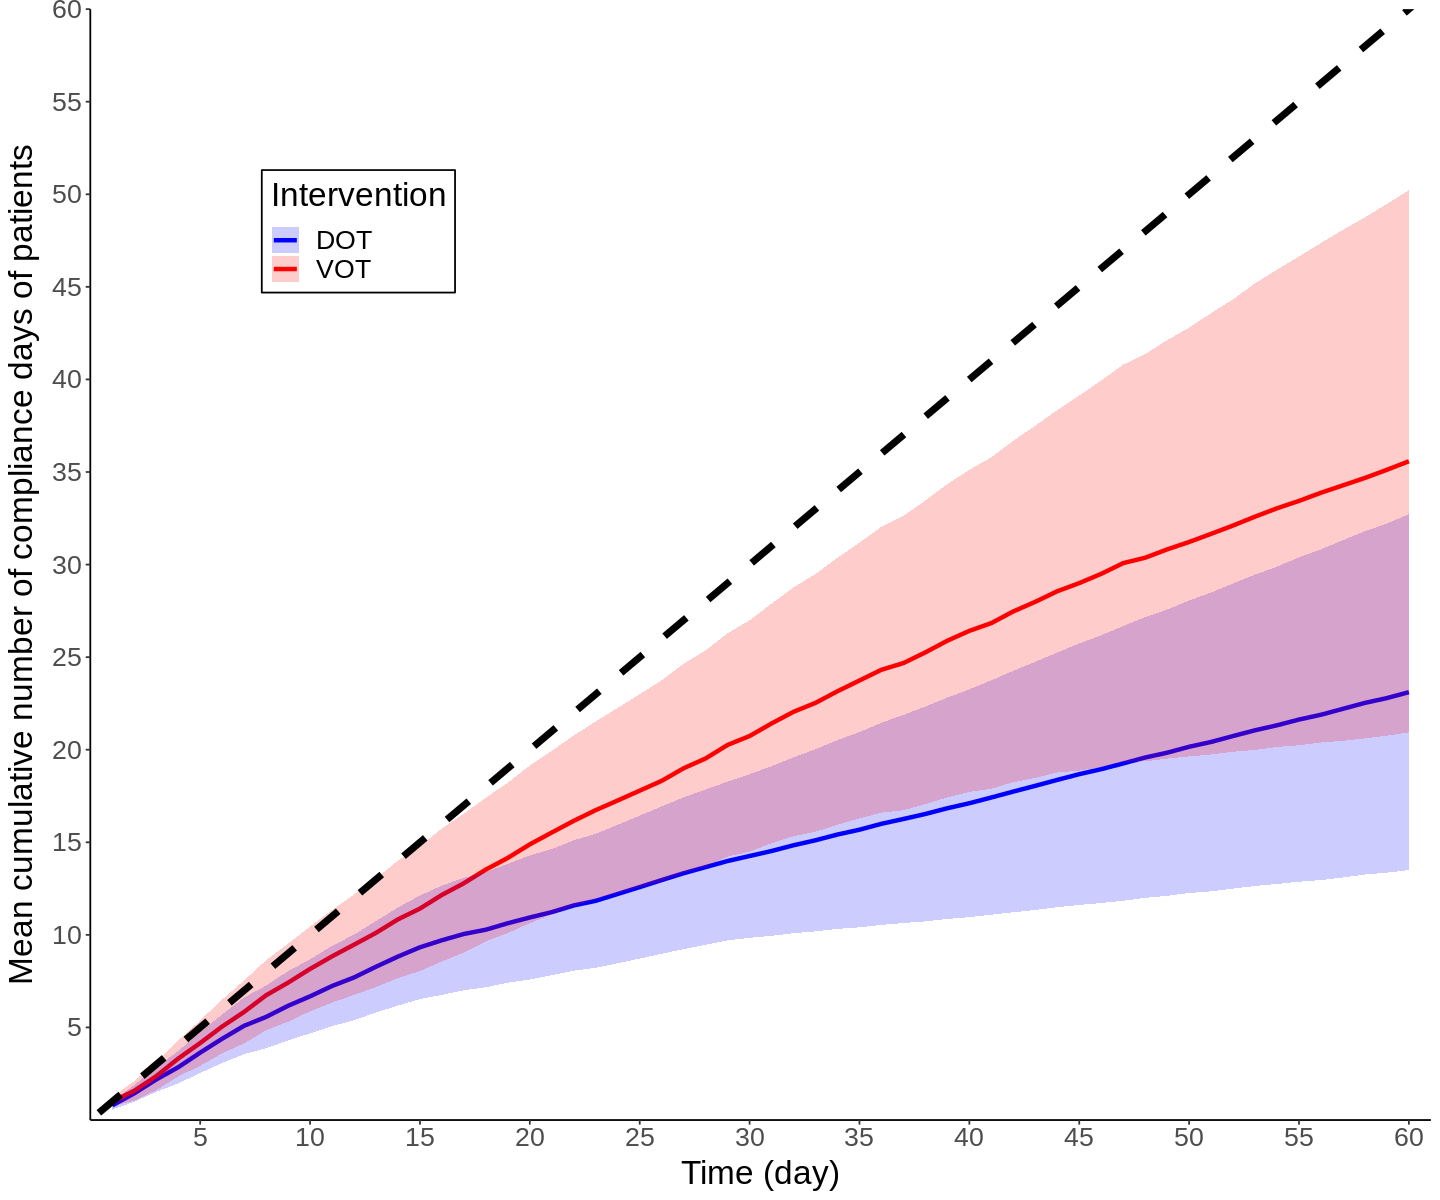

In [15]:
options(repr.plot.width=12, repr.plot.height=10)
ggplot(pat_com,aes(x=day,y=com,group=Intervention))+geom_line(aes(col=Intervention),size=1.25)+
  geom_ribbon(aes(ymin = lower, ymax = upper,fill=Intervention), alpha =0.2)+
  scale_x_continuous(breaks = 5*(1:12),limits = c(0,61),expand = c(0,0))+
  scale_y_continuous(breaks = 5*(1:12),limits = c(0,60),expand = c(0,0))+
  scale_color_manual(values = c("blue","red"))+
  scale_fill_manual(values = c("blue","red"))+
  geom_abline(intercept = 0, slope = 1, col="black",linetype=2,size=2)+
  ylab("Mean cumulative number of compliance days of patients")+
  xlab("Time (day)")+
  theme_classic()+
  theme(text = element_text(size=20),legend.position = c(0.2,0.8),
        legend.background = element_rect(linetype = 1, size = 0.5, colour = "black"),
        axis.title.y = element_text(margin = margin(t = 0, r = 8, b = 0, l = 0)),
        axis.title.x = element_text(margin = margin(t = 6, r = 0, b = 0, l = 0)))

Dynamic of compliance days among the observers

In [16]:
cob2<-observer_im
longcob2<-gather(cob2, key = "day", value = "session",d1:d60)
longcob2$day<-str_sub(longcob2$day,2,-1)
longcob2$day<-as.numeric(longcob2$day)
longcob2<-longcob2%>% group_by(no,cluster,type) %>% mutate(com=cumsum(session))
longcob2$type<-longcob2$type=="vot"
longcob2$cluster<-factor(longcob2$cluster)
ob_com<-NULL

for(i in 1:60){
  o_mod <- lmer(com ~ type + (type | cluster), longcob2[longcob2$day==i,])
  com_se_votob <- sqrt(diag(vcov(o_mod)))[2]
  com_coef_votob <- round(fixef(o_mod)[2]+fixef(o_mod)[1],2)
  upperCI_votob <-  round(com_coef_votob  + qnorm(0.975)*com_se_votob,2)
  lowerCI_votob <-  round(com_coef_votob  - qnorm(0.975)*com_se_votob,2)
  com_se_dotob <- sqrt(diag(vcov(o_mod)))[1]
  com_coef_dotob <- round(fixef(o_mod)[1],2)
  upperCI_dotob <-  round(com_coef_dotob  + qnorm(0.975)*com_se_dotob,2)
  lowerCI_dotob <-  round(com_coef_dotob  - qnorm(0.975)*com_se_dotob,2)
  ob_com<-rbind(ob_com,data.frame(day=c(i,i),Intervention=c("VOT","DOT"),
                                    com=c(com_coef_votob,com_coef_dotob),
                                    lower=c(lowerCI_votob,lowerCI_dotob),
                                    upper=c(upperCI_votob,upperCI_dotob)))
}

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -7.1e-06”
boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -7.3e-05”
boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -2.8e-04”
boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -5.4e-06”
boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSi

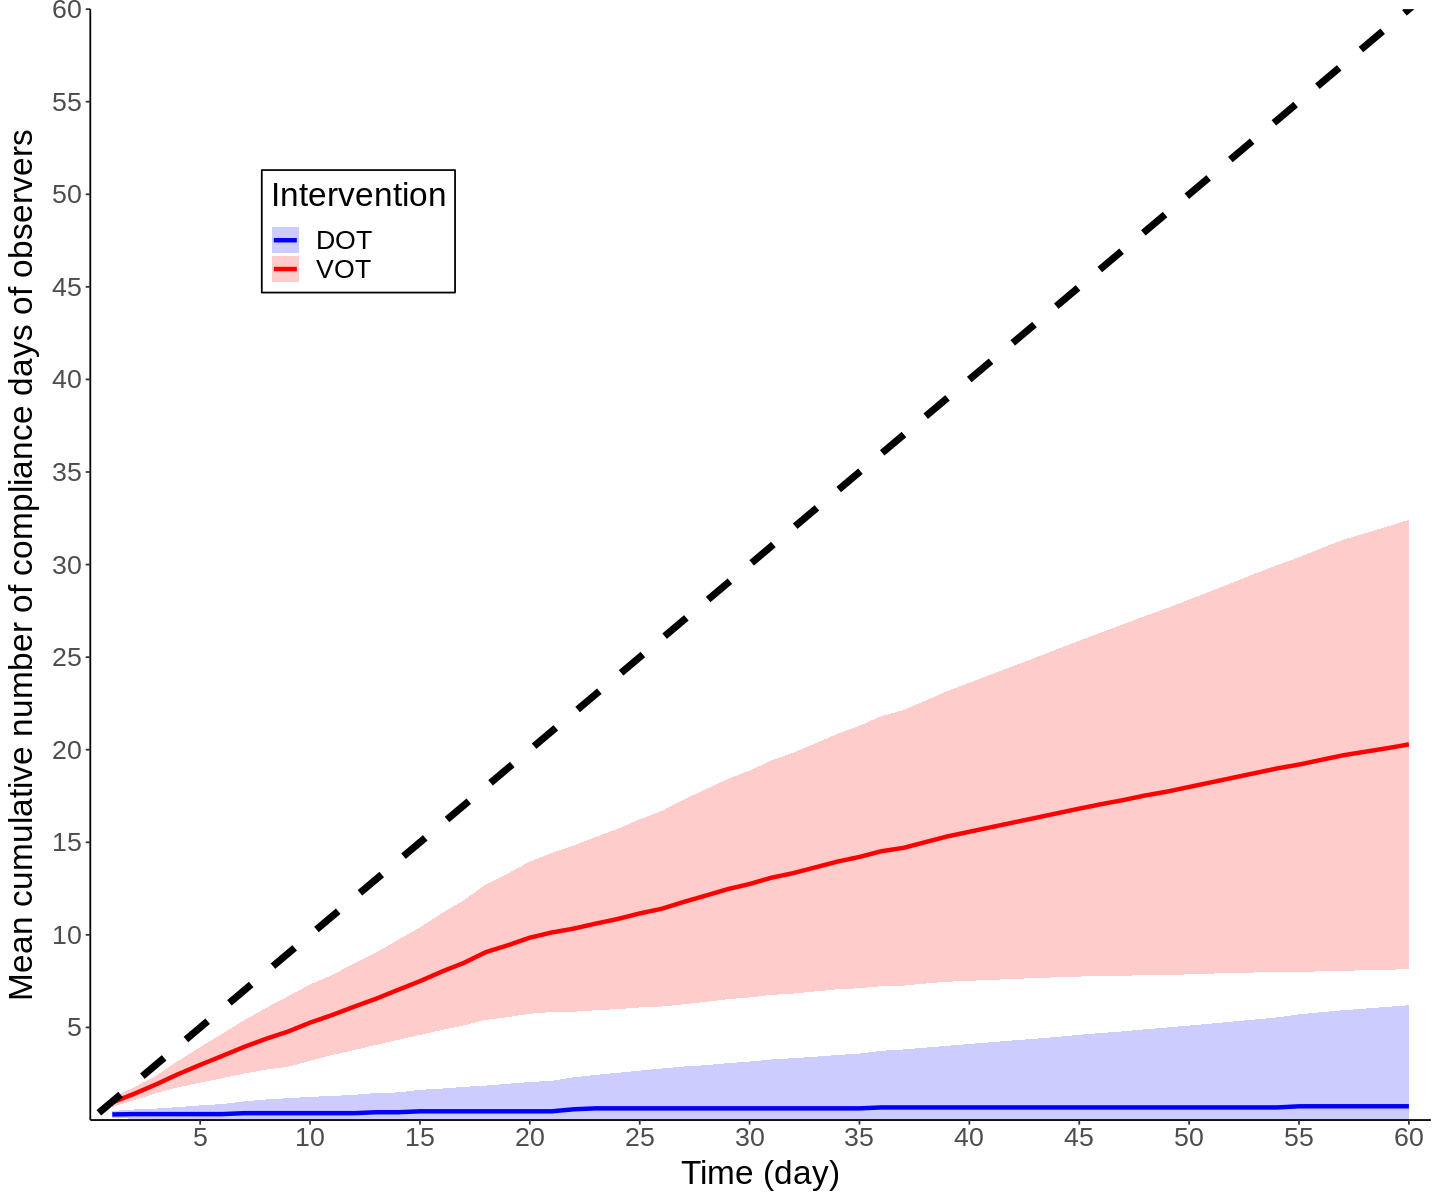

In [17]:
ob_com$lower<-ifelse(ob_com$lower<0,0,ob_com$lower)
ggplot(ob_com,aes(x=day,y=com,group=Intervention))+geom_line(aes(col=Intervention),size=1.25)+
  geom_ribbon(aes(ymin = lower, ymax = upper,fill=Intervention), alpha =0.2)+
  scale_x_continuous(breaks = 5*(1:12),limits = c(0,61),expand = c(0,0))+
  scale_y_continuous(breaks = 5*(1:12),limits = c(0,60),expand = c(0,0))+
  scale_color_manual(values = c("blue","red"))+
  scale_fill_manual(values = c("blue","red"))+
  geom_abline(intercept = 0, slope = 1, col="black",linetype=2,size=2)+
  ylab("Mean cumulative number of compliance days of observers")+
  xlab("Time (day)")+
  theme_classic()+
  theme(text = element_text(size=20),legend.position = c(0.2,0.8),
        legend.background = element_rect(linetype = 1, size = 0.5, colour = "black"),
        axis.title.y = element_text(margin = margin(t = 0, r = 8, b = 0, l = 0)),
        axis.title.x = element_text(margin = margin(t = 6, r = 0, b = 0, l = 0)))